### import libraries

In [1]:
import pandas as pd
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

### load data

In [2]:

df = pd.read_csv('datasets/raw/train_dataset.csv')
test = pd.read_csv('datasets/raw/test_dataset.csv')
data=df.copy()

### insights

In [3]:
def split_catnum(df):
    cat_cols = []
    num_cols = []

    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            num_cols.append(column)
        elif pd.api.types.is_object_dtype(df[column]):
            cat_cols.append(column)
            
    print(f'Categorical columns: {len(cat_cols)}', cat_cols)
    print(f'Numeric columns: {len(num_cols)}', num_cols)

    return num_cols,cat_cols

 

num_cols,cat_cols=split_catnum(df)


Categorical columns: 9 ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Numeric columns: 8 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [4]:
def round_ncp(df):
    #round number of meals to integers
    df['NCP'] = df['NCP'].round()
   

round_ncp(df)
df['NCP'].value_counts()
round_ncp(test)


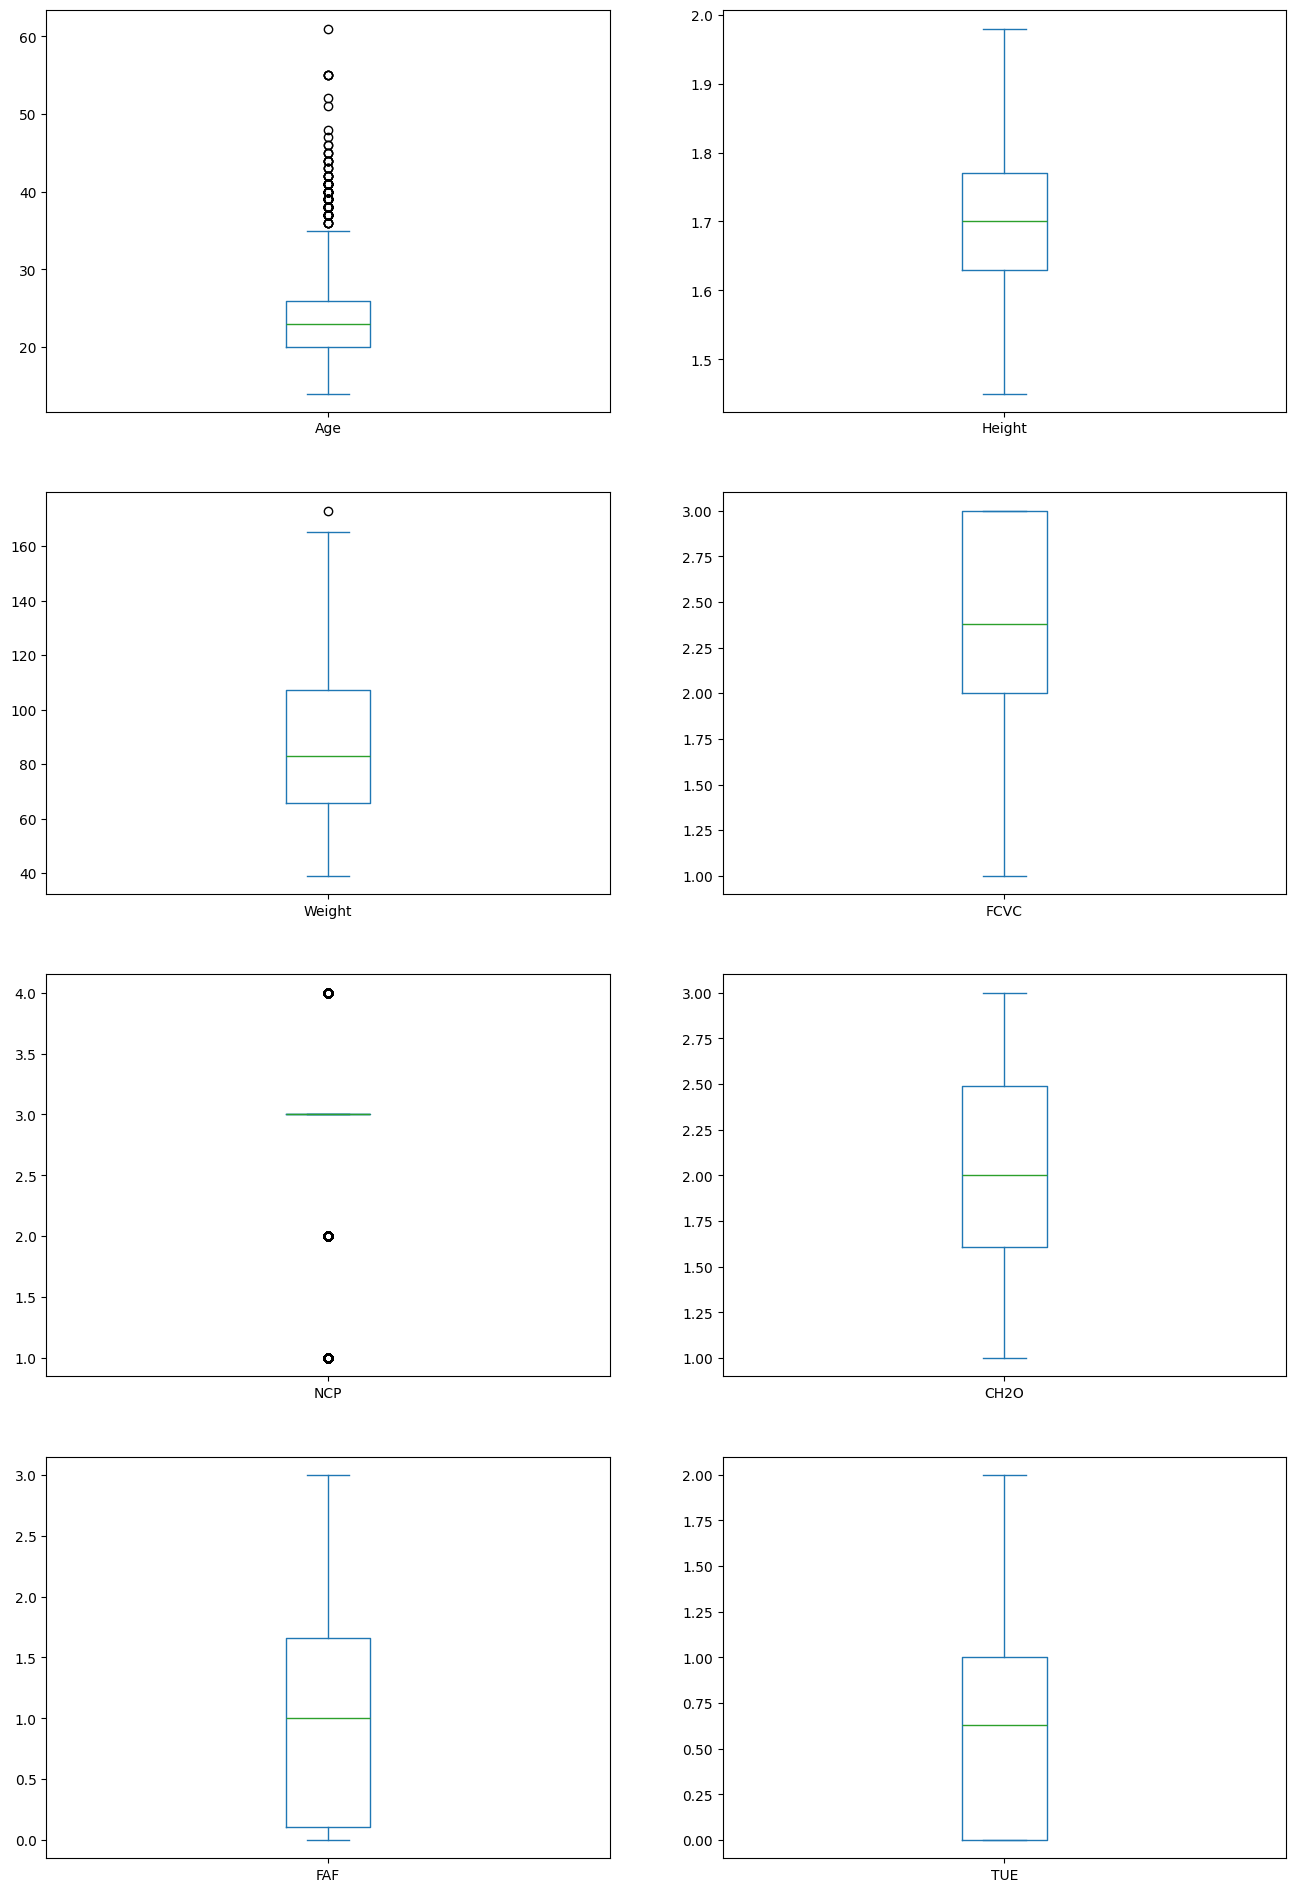

In [5]:
def plot(df,cols):
    df[cols].plot(
        kind='box',
        subplots=True, 
        layout=(4,2), 
        sharex=False, 
        figsize=(16,24)
        )
        
    plt.show()

plot(df,num_cols)


### data preperation

## outliers

In [6]:
def handle_AgeOut(df):
    df_no_outliers = df[df['Age'] <= 35]
    df_no_outliers.reset_index(drop=True, inplace=True)
    df_no_outliers.info()

handle_AgeOut(df)
handle_AgeOut(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1757 non-null   object 
 1   Age                             1757 non-null   int64  
 2   Height                          1757 non-null   float64
 3   Weight                          1757 non-null   float64
 4   family_history_with_overweight  1757 non-null   object 
 5   FAVC                            1757 non-null   object 
 6   FCVC                            1745 non-null   float64
 7   NCP                             1757 non-null   float64
 8   CAEC                            1757 non-null   object 
 9   SMOKE                           1757 non-null   object 
 10  CH2O                            1757 non-null   float64
 11  SCC                             1757 non-null   object 
 12  FAF                             17

## nulls


In [ ]:
def handle_nulls(df):
    df['FCVC']=df['FCVC'].fillna(df['FCVC'].mean())
    df['CALC']=df['CALC'].fillna(df['CALC'].mode()[0])
    

In [8]:
handle_nulls(df)
handle_nulls(test)
df.isnull().sum()


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## encoding

In [9]:

def encode(df):
    #binary encoding
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
    df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'no': 0, 'yes': 1})
    df['FAVC'] = df['FAVC'].map({'no': 0, 'yes': 1})
    df['SMOKE'] = df['SMOKE'].map({'no': 0, 'yes': 1})
    df['SCC'] = df['SCC'].map({'no': 0, 'yes': 1})
    

    #ordinal encoding
    caec_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
    calc_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
    df['CAEC'] = df['CAEC'].map(caec_mapping)
    df['CALC'] = df['CALC'].map(calc_mapping)
    
    # #frequency encoding
    freq=df['MTRANS'].value_counts(normalize=True)
    df['MTRANS']=df['MTRANS'].map(freq)
  
 
encode(df)
encode(test)


In [10]:
df['CALC'].unique()

array([1, 0, 2, 3])

In [11]:
df['CAEC'].unique()

array([1, 2, 0, 3])

### normalization

In [12]:

def scaling(df):
    scaler=MinMaxScaler()
    dfscaled=df.copy()
    dfscaled[['Age','Weight']]=scaler.fit_transform(dfscaled[['Age','Weight']])

    return dfscaled

scaledtest=scaling(test)
dfscaled=scaling(df)
scaledtest.head()




,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,0.475,1.71,0.371471,1,1,2.88,3.0,1,0,3.00,0,2.00,0.832,0,0.255924,Overweight_Level_II
1,0,0.075,1.75,0.497972,1,1,2.00,3.0,2,0,2.00,0,2.00,0.000,0,0.701422,Obesity_Type_I
2,0,0.075,1.85,0.208213,1,0,2.00,3.0,1,0,3.00,0,2.00,1.000,1,0.009479,Normal_Weight
3,0,0.375,1.78,0.668847,1,1,2.50,3.0,1,0,2.04,0,0.84,0.490,1,0.255924,Obesity_Type_II
4,0,0.225,1.80,0.670999,1,1,2.20,3.0,1,0,2.51,0,1.66,0.128,1,0.701422,Obesity_Type_II


## save preprocessed data

In [13]:

dfscaled.to_csv('datasets/clean/processedtrain.csv', index=False)
scaledtest.to_csv('datasets/clean/processedtest.csv', index=False)